<a href="https://colab.research.google.com/github/GiovanniBaselli9/Digit-Recognizer-ML/blob/main/Digit_Recognizer_Giovanni_Baselli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUZIONE

Risoluzione della competizione Kaggle “Digit Recognizer” a cura di *Giovanni Baselli*, matricola 718969.

La competizione è disponibile al seguente link: https://www.kaggle.com/c/digit-recognizer.

Lo scopo del seguente lavoro è quello di risolvere un problema di riconoscimento dei numeri da 0 a 9, presi da un dataset di immagini di numeri scritti a mano chiamato MNIST Dataset, sfruttando le capacità di alcuni dei più riconosciuti algoritmi di Machine Learning.

Spiegazioni e analisi specifiche sono reperibili dal seguente documento:
https://docs.google.com/document/d/1Z1Mm9hMZgLFHGZ-R-8dUXbEc10E83V-PauSVkE7ESHc/edit?usp=sharing 


# EDA & PREPROCESSING

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, validation_curve, KFold, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
#DOWNLOAD training e test set

train_data=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/test.csv")

In [ ]:
print("Train Data shape: ",train_data.shape)
print("Test Data shape: ",test_data.shape)

Train Data shape:  (42000, 785)
Test Data shape:  (28000, 784)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Come mostrato in tabella, ogni immagine contiene una colonna 'label' che indica il valore intero del numero rappresentato nell'immagine, mentre le restanti 784 colonne indicano i pixel dell'immagine 28x28.

In [ ]:
# isolo il target
target=train_data['label'] 

#elimino dai dati di training il target
train_data.drop('label', axis=1, inplace=True)

Rappresento la distribuzione dei numeri all'interno del dataset.

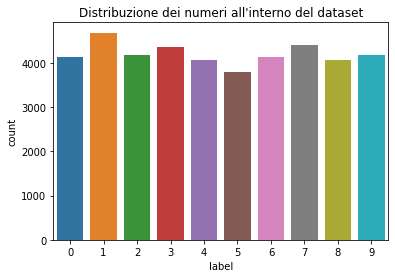

In [ ]:
sns.countplot(x=target)
plt.title("Distribuzione dei numeri all'interno del dataset")
plt.show()

In [ ]:
#normalizzo i valori dell'immagine da [0, 255] a [0.0, 1.0]

train_data=train_data/255.0
test_data=test_data/255.0

train_data.shape

(42000, 784)

In [ ]:
#elimino i duplicati
train_data.drop_duplicates(inplace=True)

train_data.shape

(42000, 784)

In [ ]:
#scaling
from sklearn.preprocessing import scale
scaled_train = scale(train_data)
scaled_test = scale(test_data)

# DATA VISUALIZATION
Visualizziamo ora le immagini graficamente. In questo caso visualizziamo le prime 30 immagini.

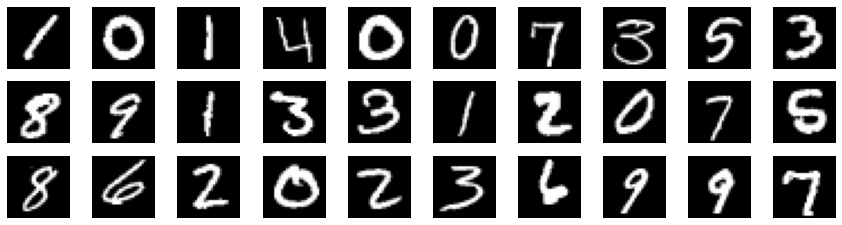

In [ ]:
plt.figure(figsize=(15,8))
for i in range(30):
    plt.subplot(6,10,i+1)
    digit=train_data.iloc[i,:]
    plt.imshow(digit.values.reshape(28,28),cmap='gray')
    plt.axis("off")
plt.show()

# MODELLIZZAZIONE
In seguito verranno utilizzati e analizzati diversi algoritmi di apprendimento.

1.   Support Vector Machines
2.   K-nearest Neighbors
3.   Naive Bayes
4.   Decision Tree
5.   Random Forest
6.   XGBoost
7.   Convolutional Neural Network





In [ ]:
#Separo il dataset in train e validation usando train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(scaled_train, target, test_size = 0.3, random_state = 4)

In [ ]:
print(X_train.shape, X_valid.shape)

(29400, 784) (12600, 784)


In [ ]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_valid, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 2928, 1: 3303, 2: 2925, 3: 3066, 4: 2882, 5: 2663, 6: 2880, 7: 3038, 8: 2824, 9: 2891}

Test labels:  {0: 1204, 1: 1381, 2: 1252, 3: 1285, 4: 1190, 5: 1132, 6: 1257, 7: 1363, 8: 1239, 9: 1297}


# **SVM** - *MODELLO* *LINEARE*

In [ ]:
from sklearn.svm import SVC

In [ ]:
#SVC, Support Vector Classification, è una funzione in grado di realizzare SVM

#modello lineare
model_SVMlin = SVC(kernel='linear')
%time model_SVMlin.fit(X_train, y_train)

CPU times: user 2min 13s, sys: 79 ms, total: 2min 13s
Wall time: 2min 12s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
%time y_predLin = model_SVMlin.predict(X_valid)

CPU times: user 1min 27s, sys: 48.7 ms, total: 1min 27s
Wall time: 1min 27s


In [ ]:
#Accuratezza sul validation set
print("ACCURATEZZA (modello lineare):", metrics.accuracy_score(y_valid, y_predLin), "\n")

ACCURATEZZA (modello lineare): 0.9158730158730158 



SVM lineare:
[[1166    0    6    5    3   10    9    1    3    1]
 [   0 1353    6    5    0    2    1    4    9    1]
 [  12   22 1128   27   13    6   12   11   16    5]
 [   4    2   41 1146    2   47    3   10   23    7]
 [   3    5   17    3 1113    2    8    7    1   31]
 [  12    6   18   57    9  990   14    2   20    4]
 [  14    3   17    0    7   19 1192    0    5    0]
 [   5    7   20   10   16    3    0 1256    4   42]
 [   9   26   37   50    5   35   10    6 1048   13]
 [   6    5    9   13   55    4    0   46   11 1148]]


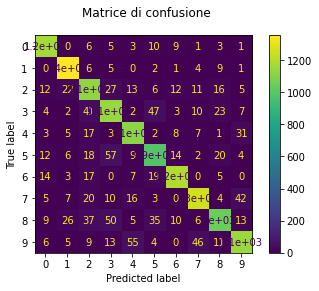

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(model_SVMlin, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"SVM lineare:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_predLin))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1204
           1       0.95      0.98      0.96      1381
           2       0.87      0.90      0.88      1252
           3       0.87      0.89      0.88      1285
           4       0.91      0.94      0.92      1190
           5       0.89      0.87      0.88      1132
           6       0.95      0.95      0.95      1257
           7       0.94      0.92      0.93      1363
           8       0.92      0.85      0.88      1239
           9       0.92      0.89      0.90      1297

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



In [ ]:
#K-fold Cross Validation

# Sfruttiamo il K-fold per valutare le performance del modello attraverso 5 diversi Sample
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = SVC(kernel='linear')

# calcolo dei cross-validation scores 
cv_scores = cross_val_score(model, X_train, y_train, cv = folds, scoring ='accuracy', n_jobs=-1)

# Stampa i 5 valori di accuratezza dati dai diversi fold
print(cv_scores)
print(f'accuratezza media = {cv_scores.mean()}')

[0.91496599 0.91122449 0.91309524 0.91819728 0.90867347]
accuratezza media = 0.9132312925170067


Si ottiene un buon risultato nel caso lineare, con un'accuratezza media di 0.9132 sul validation set.

**DATA VISUALIZATION - predizioni**

Valutiamo l'andamento delle predizioni su alcuni esempi utilizzati.

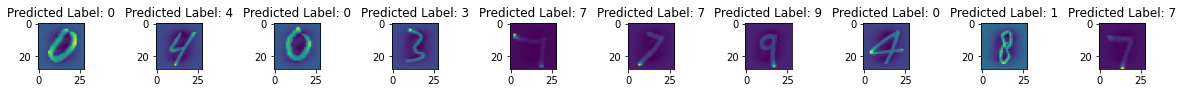

In [ ]:
plt.figure(figsize=(25,10))

for i in range(10):
    plt.subplot(10,12,i+1)
    _2d = X_valid[i].reshape(28,28)
    plt.title(f'Predicted Label: {y_predLin[i]}')
    plt.imshow(_2d)
plt.show()

**Prediction sul TEST SET**


In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/sample_submission.csv")

In [ ]:
# Prediction per il modello Lineare
%time predictionsLin=model_SVMlin.predict(scaled_test)

CPU times: user 3min 15s, sys: 147 ms, total: 3min 16s
Wall time: 3min 15s


In [ ]:
sample_submission["Label"] = predictionsLin
sample_submission.to_csv('SVMlin_submission.csv', index=False)

Facendo il submit del csv creato su Kaggle, viene dato come risultato per il modello lineare di

score: **0.91564**

# **SVM** - *MODELLO NON LINEARE*

Utilizzeremo il modello RBF.

In [ ]:
from sklearn.svm import SVC

In [ ]:
#MODELLO NON LINEARE
#iniziamo utilizzando come iperparametri C=1 e gamma='auto'
model_SVM_NL = SVC(C=1, gamma='auto', kernel='rbf')
%time model_SVM_NL.fit(X_train, y_train)

CPU times: user 4min 27s, sys: 160 ms, total: 4min 27s
Wall time: 4min 26s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
%time y_pred2 = model_SVM_NL.predict(X_valid)

CPU times: user 2min 35s, sys: 126 ms, total: 2min 36s
Wall time: 2min 35s


In [ ]:
#Accuratezza sul validation set
print("ACCURATEZZA (modello lineare):", metrics.accuracy_score(y_valid, y_pred2), "\n")

ACCURATEZZA (modello lineare): 0.958015873015873 



SVM non lineare:
[[1185    0    6    2    3    1    5    0    2    0]
 [   0 1355    9    3    1    0    2    7    4    0]
 [   7    3 1204   10    2    1    4   15    4    2]
 [   0    5   19 1207    3   11    1   16   13   10]
 [   0    3    8    1 1140    4    6   10    2   16]
 [   4    3    7   21    1 1070    6   13    5    2]
 [   3    2    1    1    4    9 1230    5    2    0]
 [   5    6   15    4    7    0    0 1300    3   23]
 [   2   11    5   14    8    6    4   13 1172    4]
 [   5    1    6   19   17    1    0   32    8 1208]]


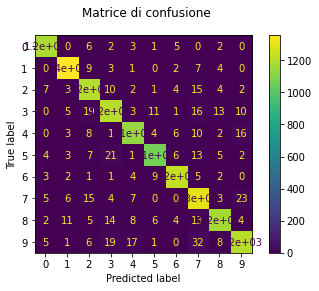

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(model_SVM_NL, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"SVM non lineare:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1204
           1       0.98      0.98      0.98      1381
           2       0.94      0.96      0.95      1252
           3       0.94      0.94      0.94      1285
           4       0.96      0.96      0.96      1190
           5       0.97      0.95      0.96      1132
           6       0.98      0.98      0.98      1257
           7       0.92      0.95      0.94      1363
           8       0.96      0.95      0.96      1239
           9       0.95      0.93      0.94      1297

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [ ]:
#K-fold Cross Validation

# Sfruttiamo il K-fold per valutare le performance del modello attraverso 5 diversi Sample
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [ ]:
model = SVC(C=1, gamma='auto', kernel='rbf')

# calcolo dei cross-validation scores 
cv_scores = cross_val_score(model, X_train, y_train, cv = folds, scoring ='accuracy', n_jobs=-1)

# Stampa i 5 valori di accuratezza dati dai diversi fold
print(cv_scores)
print(f'accuratezza media = {cv_scores.mean()}')

[0.95544218 0.96003401 0.95119048 0.94829932 0.94863946]
accuratezza media = 0.9527210884353741


Sfruttiamo ora il Grid Search per trovare i valori ottimali degli iperparametri C e gamma.

In [ ]:
#GRID SEARCH

iperparametri=[{'gamma': [0.01, 0.001],
               'C' : [10, 100]}]

model_cv=GridSearchCV(estimator=SVC(kernel='rbf'),
                      param_grid=iperparametri,
                      scoring='accuracy', cv=folds,
                      n_jobs=4, verbose=1, return_train_score=True)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed: 110.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [10, 100], 'gamma': [0.01, 0.001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [ ]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1325.596369,6.985664,156.488077,0.940129,10,0.01,"{'C': 10, 'gamma': 0.01}",0.812143,0.809048,0.810952,0.815714,0.809762,0.811524,0.002345,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,201.749963,1.774271,67.652228,0.609664,10,0.001,"{'C': 10, 'gamma': 0.001}",0.957619,0.958810,0.958333,0.958810,0.950714,0.956857,0.003102,1,0.999048,0.999167,0.998988,0.999048,0.999167,0.999083,0.000071
2,1315.124157,4.864907,155.999542,0.604044,100,0.01,"{'C': 100, 'gamma': 0.01}",0.812143,0.809048,0.810952,0.815714,0.809762,0.811524,0.002345,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,184.807122,30.006335,60.551238,13.497235,100,0.001,"{'C': 100, 'gamma': 0.001}",0.957143,0.957619,0.956667,0.958095,0.951190,0.956143,0.002522,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
best_score=model_cv.best_score_
best_iperparametri=model_cv.best_params_
print("Best score: ", best_score)
print("Best C: ", best_iperparametri['C'])
print("Best gamma: ", best_iperparametri['gamma'],)

Best score:  0.956857142857143
Best C:  10
Best gamma:  0.001


In [ ]:
#best_SVMmodel=SVC(C=best_iperparametri['C'], gamma=best_iperparametri['gamma'], kernel="rbf")
best_SVMmodel=SVC(C=10, gamma=0.001, kernel="rbf")

%time best_SVMmodel.fit(X_train, y_train)

CPU times: user 3min 30s, sys: 147 ms, total: 3min 30s
Wall time: 3min 29s


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
%time y_pred=best_SVMmodel.predict(X_valid)

CPU times: user 2min 13s, sys: 85.8 ms, total: 2min 13s
Wall time: 2min 12s


In [ ]:
#Accuratezza sul validation set
print("ACCURATEZZA (modello migliore) :", metrics.accuracy_score(y_valid, y_pred))

ACCURATEZZA (modello migliore) : 0.9643650793650793


SVM non lineare (best):
[[1189    0    3    3    1    2    4    1    1    0]
 [   0 1358    9    1    1    1    2    7    2    0]
 [   6    5 1212    9    0    0    4   14    2    0]
 [   0    1   17 1219    1   13    0   15   11    8]
 [   1    3   10    1 1144    2    5    8    2   14]
 [   5    2    5   17    0 1080    8    9    4    2]
 [   6    2    1    1    3    5 1233    4    2    0]
 [   4    5   12    3    6    1    0 1308    3   21]
 [   2    6    9    9    7    7    4   12 1179    4]
 [   5    3    5    9   16    0    0   24    6 1229]]


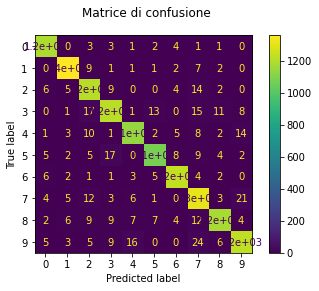

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(best_SVMmodel, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"SVM non lineare (best):\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Classification report
print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1204
           1       0.98      0.98      0.98      1381
           2       0.94      0.97      0.96      1252
           3       0.96      0.95      0.95      1285
           4       0.97      0.96      0.97      1190
           5       0.97      0.95      0.96      1132
           6       0.98      0.98      0.98      1257
           7       0.93      0.96      0.95      1363
           8       0.97      0.95      0.96      1239
           9       0.96      0.95      0.95      1297

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



**DATA VISUALIZATION - predizioni**

Valutiamo l'andamento delle predizioni su alcuni esempi utilizzati.

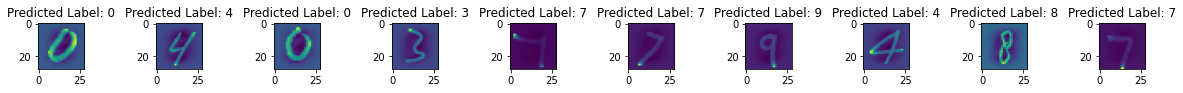

In [ ]:
plt.figure(figsize=(25,10))

for i in range(10):
    plt.subplot(10,12,i+1)
    _2d = X_valid[i].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[i]}')
    plt.imshow(_2d)
plt.show()

**Prediction sul TEST SET**

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/sample_submission.csv")

In [ ]:
# Prediction per il modello Non Lineare
%time predictionsNL=best_SVMmodel.predict(scaled_test)

CPU times: user 4min 56s, sys: 181 ms, total: 4min 56s
Wall time: 4min 55s


In [ ]:
sample_submission["Label"] = predictionsNL
sample_submission.to_csv('SVMnl_submission.csv', index=False)

Facendo il submit del csv creato su Kaggle, viene dato come risultato per il modello non lineare di

score: **0.96460**

Un valore molto buono.

# **K-nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Per il modello
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold #Per la scelta dei parametri
from sklearn.metrics import confusion_matrix, classification_report # Per valutare le performance

In [ ]:
KNN_model=KNeighborsClassifier()

%time KNN_model.fit(X_train, y_train)

CPU times: user 9.27 s, sys: 37 ms, total: 9.3 s
Wall time: 9.26 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
%time y_KNN=KNN_model.predict(X_valid)

CPU times: user 9min 30s, sys: 431 ms, total: 9min 31s
Wall time: 9min 28s


In [ ]:
#Accuratezza sul validation set
print("ACCURATEZZA (KNN):", metrics.accuracy_score(y_valid, y_KNN), "\n")

ACCURATEZZA (KNN): 0.935952380952381 



KNN:
[[1186    0    4    2    1    3    8    0    0    0]
 [   1 1368    4    0    1    0    2    3    1    1]
 [  21   15 1150   26    1    4   14   13    6    2]
 [   4   10   20 1199    0   14    1   17   11    9]
 [   0   16    9    1 1106    7    4    8    1   38]
 [  10    1    9   42    6 1035   12    2    4   11]
 [  15    3    5    1    6   14 1212    1    0    0]
 [   5   18    7    1   12    0    0 1276    1   43]
 [   9   20    8   33    9   47    7    8 1084   14]
 [   9    1    4   15   31    5    0   51    4 1177]]


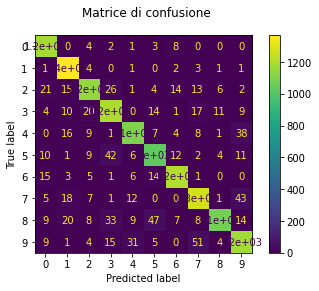

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(KNN_model, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"KNN:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_KNN))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1204
           1       0.94      0.99      0.97      1381
           2       0.94      0.92      0.93      1252
           3       0.91      0.93      0.92      1285
           4       0.94      0.93      0.94      1190
           5       0.92      0.91      0.92      1132
           6       0.96      0.96      0.96      1257
           7       0.93      0.94      0.93      1363
           8       0.97      0.87      0.92      1239
           9       0.91      0.91      0.91      1297

    accuracy                           0.94     12600
   macro avg       0.94      0.94      0.94     12600
weighted avg       0.94      0.94      0.94     12600



In [ ]:
#K-fold Cross Validation

# Sfruttiamo il K-fold per valutare le performance del modello attraverso 5 diversi Sample
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [ ]:
model = KNeighborsClassifier()

# calcolo dei cross-validation scores 
cv_scores = cross_val_score(model, X_train, y_train, cv = folds, scoring ='accuracy', n_jobs=-1)

# Stampa i 5 valori di accuratezza dati dai diversi fold
print(cv_scores)
print(f'accuratezza media = {cv_scores.mean()}')

[0.92690476 0.92714286 0.9247619  0.92380952 0.92357143]
accuratezza media = 0.9252380952380953


In [ ]:
iperparametri = {
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 6]
}

grid_estimator = GridSearchCV(estimator=KNeighborsClassifier(), 
                              param_grid=iperparametri,
                              cv=folds, # strategia di cross validation
                              verbose=2, 
                              n_jobs=4) 

# Fitting the estimator with training data
grid_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 50.4min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 56.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=4,
             param_grid={'n_neighbors': [3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
cv_results=pd.DataFrame(grid_estimator.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.022441,0.213993,326.161756,0.500094,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.925238,0.924762,0.924524,0.924286,0.926905,0.925143,0.000936,6
1,6.865738,0.111802,326.245780,0.942126,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.928571,0.928571,0.926905,0.929762,0.929762,0.928714,0.001050,4
2,6.761199,0.066383,329.182502,0.871659,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.920000,0.926667,0.923333,0.924524,0.922143,0.923333,0.002239,7
3,6.700785,0.136483,329.169541,0.489068,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.931190,0.930476,0.929048,0.930238,0.930714,0.930333,0.000716,1
4,6.781193,0.174372,330.925393,0.925612,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.926905,0.927143,0.924762,0.923810,0.923571,0.925238,0.001513,5
5,6.941790,0.115724,330.495129,0.595885,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.930238,0.933333,0.927381,0.928333,0.924762,0.928810,0.002869,3
6,6.775983,0.041888,332.351234,1.129473,6,uniform,"{'n_neighbors': 6, 'weights': 'uniform'}",0.925238,0.924762,0.923810,0.922381,0.919524,0.923143,0.002056,8
7,6.794695,0.068841,330.263018,2.849658,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",0.932857,0.931667,0.928095,0.928571,0.927381,0.929714,0.002148,2


In [ ]:
best_score=grid_estimator.best_score_
best_iperparametri=grid_estimator.best_params_
print("Best score: ", best_score)
print("Best weights: ", best_iperparametri['weights'])
print("Best number of neighbors: ", best_iperparametri['n_neighbors'])

Best score:  0.9303333333333335
Best weights:  distance
Best number of neighbors:  4


In [ ]:
#best_KNNmodel=KNeighborsClassifier(weights=best_iperparametri['weights'], 
#                 n_neighbors=best_iperparametri['n_neighbors'])
best_KNNmodel=KNeighborsClassifier(weights='distance', 
                  n_neighbors=4)

%time best_KNNmodel.fit(X_train, y_train)

CPU times: user 7.79 s, sys: 21.4 ms, total: 7.81 s
Wall time: 7.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [ ]:
%time y_pred=best_KNNmodel.predict(X_valid)

CPU times: user 9min 25s, sys: 399 ms, total: 9min 25s
Wall time: 9min 23s


In [ ]:
#Accuratezza sul validation set
print("ACCURATEZZA (modello migliore) :", metrics.accuracy_score(y_valid, y_pred))

ACCURATEZZA (modello migliore) : 0.9402380952380952


KNN (best):
[[1186    0    2    3    1    3    9    0    0    0]
 [   1 1365    5    0    1    0    3    4    1    1]
 [  17    7 1155   27    3    3   12   14    9    5]
 [   4    8   20 1199    0   15    1   15   13   10]
 [   0   13    7    1 1105    6    5   10    2   41]
 [   8    1    6   34    5 1043   13    2    8   12]
 [  16    3    1    2    5    9 1220    1    0    0]
 [   4   15    8    1    7    0    0 1284    1   43]
 [  10   19    6   26    8   43    6    6 1098   17]
 [   8    0    3   10   23    6    0   49    6 1192]]


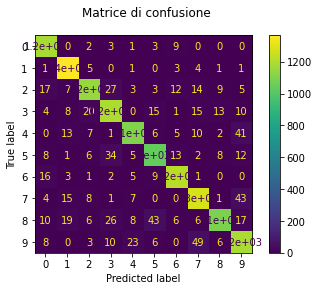

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(best_KNNmodel, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"KNN (best):\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1204
           1       0.95      0.99      0.97      1381
           2       0.95      0.92      0.94      1252
           3       0.92      0.93      0.93      1285
           4       0.95      0.93      0.94      1190
           5       0.92      0.92      0.92      1132
           6       0.96      0.97      0.97      1257
           7       0.93      0.94      0.93      1363
           8       0.96      0.89      0.92      1239
           9       0.90      0.92      0.91      1297

    accuracy                           0.94     12600
   macro avg       0.94      0.94      0.94     12600
weighted avg       0.94      0.94      0.94     12600



**DATA VISUALIZATION - predizioni**

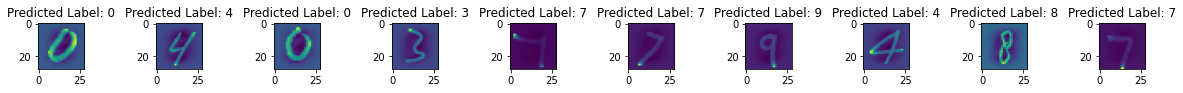

In [ ]:
plt.figure(figsize=(25,10))

for i in range(10):
    plt.subplot(10,12,i+1)
    _2d = X_valid[i].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[i]}')
    plt.imshow(_2d)
plt.show()

**Prediction sul TEST SET**

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/sample_submission.csv")

In [ ]:
# Prediction per il best KNN
%time predictionsKNN=best_KNNmodel.predict(scaled_test)

CPU times: user 22min 14s, sys: 937 ms, total: 22min 15s
Wall time: 22min 8s


In [ ]:
sample_submission["Label"] = predictionsKNN
sample_submission.to_csv('KNN_submission.csv', index=False)

Facendo il submit del csv creato su Kaggle, viene dato come risultato per il modello KNN di

score: **0.93446**

# **Naive Bayes**

Sono stati implementati:
*   Gaussian Naive Bayes
*   Bernoulli Naive Bayes



In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

**Gaussian Naive Bayes**

In [ ]:
#Gaussian Naive Bayes
gnb_model = GaussianNB()
%time gnb_model.fit(X_train, y_train)

CPU times: user 420 ms, sys: 10.3 ms, total: 430 ms
Wall time: 454 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
%time y_gnb=gnb_model.predict(X_valid)

CPU times: user 563 ms, sys: 7.26 ms, total: 570 ms
Wall time: 566 ms


In [ ]:
#Accuratezza sul validation set
print("ACCURATEZZA (Gaussian Naive Bayes):", metrics.accuracy_score(y_valid, y_gnb), "\n")

ACCURATEZZA (Gaussian Naive Bayes): 0.5365873015873016 



Gaussian NB:
[[1032    1    2    7    2    2   45    1   82   30]
 [   1 1312    3    5    1    4   17    1   23   14]
 [  97   48  225  198    4   10  321    3  322   24]
 [  42   89    6  507    3    1   52    9  452  124]
 [  21   10    9   10  140    6   97    5  286  606]
 [  94   36    7   41    5   46   50    1  720  132]
 [  12   24    1    1    2    4 1171    0   40    2]
 [   5   10    0   23   11    2    5  354   81  872]
 [  15  167    1   20    2   10   19    0  744  261]
 [   7    8    1    5    6    1    0   13   26 1230]]


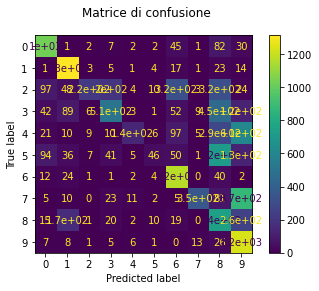

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(gnb_model, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"Gaussian NB:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_gnb))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1204
           1       0.77      0.95      0.85      1381
           2       0.88      0.18      0.30      1252
           3       0.62      0.39      0.48      1285
           4       0.80      0.12      0.20      1190
           5       0.53      0.04      0.08      1132
           6       0.66      0.93      0.77      1257
           7       0.91      0.26      0.40      1363
           8       0.27      0.60      0.37      1239
           9       0.37      0.95      0.54      1297

    accuracy                           0.54     12600
   macro avg       0.66      0.53      0.48     12600
weighted avg       0.66      0.54      0.49     12600



**Bernoulli Naive Bayes**

In [ ]:
#Bernoulli Naive Bayes
bnb_model = BernoulliNB()
%time bnb_model.fit(X_train, y_train)

CPU times: user 384 ms, sys: 16.7 ms, total: 400 ms
Wall time: 317 ms


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
%time y_bnb=bnb_model.predict(X_valid)

CPU times: user 176 ms, sys: 78.7 ms, total: 254 ms
Wall time: 144 ms


In [ ]:
#Accuratezza sul validation set
print("ACCURATEZZA (Bernoulli Naive Bayes):", metrics.accuracy_score(y_valid, y_bnb), "\n")

ACCURATEZZA (Bernoulli Naive Bayes): 0.8301587301587302 



Bernoulli NB:
[[1080    0    8    5    2   47   33    0   26    3]
 [   0 1320   10    2    1   13    5    1   29    0]
 [  23   21 1009   54   22    5   54   14   48    2]
 [   9   34   58 1028    3   26   15   17   61   34]
 [   1    9    7    1  928    5   18    6   25  190]
 [  32   12   13  169   26  789   30    6   26   29]
 [  21   36   19    0   12   26 1129    0   14    0]
 [   9   33   10    1   34    1    0 1152   30   93]
 [  10   52   14   93   14   31    9    2  960   54]
 [  14   27    1   23   86    8    0   46   27 1065]]


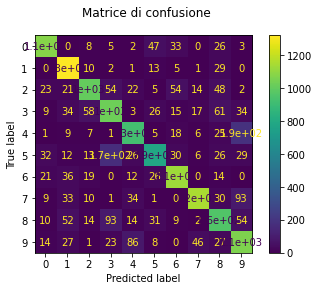

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(bnb_model, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"Bernoulli NB:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_bnb))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1204
           1       0.85      0.96      0.90      1381
           2       0.88      0.81      0.84      1252
           3       0.75      0.80      0.77      1285
           4       0.82      0.78      0.80      1190
           5       0.83      0.70      0.76      1132
           6       0.87      0.90      0.89      1257
           7       0.93      0.85      0.88      1363
           8       0.77      0.77      0.77      1239
           9       0.72      0.82      0.77      1297

    accuracy                           0.83     12600
   macro avg       0.83      0.83      0.83     12600
weighted avg       0.83      0.83      0.83     12600



In [ ]:
#K-fold Cross Validation - BERNOULLI NAIVE BAYES

# Sfruttiamo il K-fold per valutare le performance del modello attraverso 5 diversi Sample
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model1 = BernoulliNB()
model2 = GaussianNB()

# calcolo dei cross-validation scores 
cv_scores1 = cross_val_score(model1, X_train, y_train, cv = folds, scoring ='accuracy', n_jobs=-1)
cv_scores2 = cross_val_score(model2, X_train, y_train, cv = folds, scoring ='accuracy', n_jobs=-1)

# Stampa i 5 valori di accuratezza dati dai diversi fold
print(cv_scores1)
print(f'accuratezza media Bernoulli= {cv_scores1.mean()}')
print('\n')

print(cv_scores2)
print(f'accuratezza media Gaussian= {cv_scores2.mean()}')

[0.83605442 0.8297619  0.82329932 0.82244898 0.83146259]
accuratezza media Bernoulli= 0.8286054421768707


[0.54353741 0.54489796 0.53843537 0.54761905 0.53554422]
accuratezza media Gaussian= 0.5420068027210884


**DATA VISUALIZATION - predizioni**

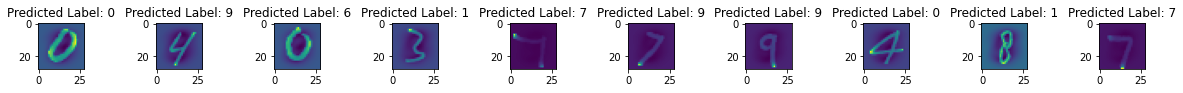

In [ ]:
plt.figure(figsize=(25,10))

for i in range(10):
    plt.subplot(10,12,i+1)
    _2d = X_valid[i].reshape(28,28)
    plt.title(f'Predicted Label: {y_gnb[i]}')
    plt.imshow(_2d)
plt.show()

Si può notare già da questi primi 10 esempi come il modello Gaussian Naive Bayes sbagli spesso le predizioni.

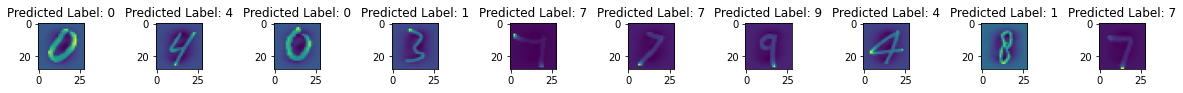

In [ ]:
plt.figure(figsize=(25,10))

for i in range(10):
    plt.subplot(10,12,i+1)
    _2d = X_valid[i].reshape(28,28)
    plt.title(f'Predicted Label: {y_bnb[i]}')
    plt.imshow(_2d)
plt.show()

Il modello di Bernoulli risulta invece migliore, seppur sbagliando anch'esso.

**Prediction sul TEST SET**

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/sample_submission.csv")

In [ ]:
%time predictionsGaussianNB=gnb_model.predict(scaled_test)

CPU times: user 1.37 s, sys: 14.8 ms, total: 1.39 s
Wall time: 1.4 s


In [ ]:
%time predictionsBernoulliNB=bnb_model.predict(scaled_test)

CPU times: user 477 ms, sys: 34.2 ms, total: 511 ms
Wall time: 401 ms


In [ ]:
sample_submission["Label"] = predictionsGaussianNB
sample_submission.to_csv('GNB_submission.csv', index=False)

In [ ]:
sample_submission["Label"] = predictionsBernoulliNB
sample_submission.to_csv('BNB_submission.csv', index=False)

*score GAUSSIAN NAIVE BAYES*: **0.13382** 

*score BERNOULLI NAIVE BAYES*: **0.83292** 

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
model_tree=DecisionTreeClassifier(criterion='gini', random_state=1)

%time model_tree.fit(X_train, y_train)

CPU times: user 9.35 s, sys: 30.9 ms, total: 9.38 s
Wall time: 9.37 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
%time y_tree=model_tree.predict(X_valid)

CPU times: user 29.4 ms, sys: 0 ns, total: 29.4 ms
Wall time: 32.2 ms


In [ ]:
model_tree.score(X_train, y_train.values.ravel())

1.0

Viene dato uno score equivalente a 1.0, pertanto è probabile che ci sia overfitting.

In [ ]:
#Accuratezza
print("ACCURATEZZA (Decision Tree):", metrics.accuracy_score(y_valid, y_tree), "\n")

ACCURATEZZA (Decision Tree): 0.8453174603174604 



Decision Tree:
[[1090    1   32   10    6   21   20    3   12    9]
 [   0 1304   10   12    7   13    7    7   15    6]
 [  23   23 1012   52   20   13   26   27   40   16]
 [   8   20   47 1038   11   48   10   25   54   24]
 [  17    7   31    7  985   17   22   13   25   66]
 [  19    6   12   77   13  899   33    9   41   23]
 [  12    7   24   17   20   53 1091    5   20    8]
 [  14    7   49   19   15   11    6 1176   15   51]
 [  21   29   34   37   30   37   21   19  967   44]
 [   8    5   15   31   52   14    5   46   32 1089]]


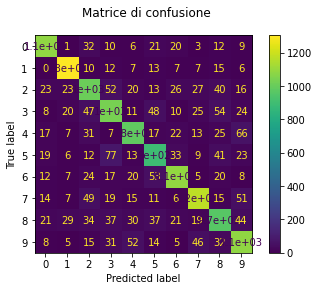

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(model_tree, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"Decision Tree:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_tree))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1204
           1       0.93      0.94      0.93      1381
           2       0.80      0.81      0.80      1252
           3       0.80      0.81      0.80      1285
           4       0.85      0.83      0.84      1190
           5       0.80      0.79      0.80      1132
           6       0.88      0.87      0.87      1257
           7       0.88      0.86      0.87      1363
           8       0.79      0.78      0.79      1239
           9       0.82      0.84      0.83      1297

    accuracy                           0.85     12600
   macro avg       0.84      0.84      0.84     12600
weighted avg       0.85      0.85      0.85     12600



In [ ]:
#K-fold Cross Validation

# Sfruttiamo il K-fold per valutare le performance del modello attraverso 5 diversi Sample
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = DecisionTreeClassifier(criterion='gini', random_state=1)

# calcolo dei cross-validation scores 
cv_scores = cross_val_score(model, X_train, y_train, cv = folds, scoring ='accuracy', n_jobs=-1)

# Stampa i 5 valori di accuratezza dati dai diversi fold
print(cv_scores)
print(f'accuratezza media = {cv_scores.mean()}')

[0.82809524 0.83595238 0.83190476 0.83142857 0.84333333]
accuratezza media = 0.8341428571428571


In [ ]:
iperparametri={
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': [700, 740, 780],
}

grid_estimator = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1), 
                              param_grid=iperparametri,
                              cv=folds, # strategia di cross validation
                              scoring='accuracy',
                              verbose=2, 
                              n_jobs=4) 

# Fitting the estimator with training data
grid_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   57.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed: 12.7min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed: 25.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
            

In [ ]:
best_score=grid_estimator.best_score_
best_iperparametri=grid_estimator.best_params_
print("Best score: ", best_score)
print("Best criterion: ", best_iperparametri['criterion'])
print("Best max_depth: ", best_iperparametri['max_depth'])
print("Best min_samples_leaf: ", best_iperparametri['min_samples_leaf'],)

Best score:  0.8421904761904762
Best criterion:  entropy
Best max_depth:  20
Best min_samples_leaf:  5


In [ ]:
#best_tree=grid_estimator.best_estimator_
best_tree=DecisionTreeClassifier(criterion='entropy',
                                 max_depth=20, min_samples_leaf=5,
                                 random_state=1)

%time best_tree.fit(X_train,y_train)

CPU times: user 9.88 s, sys: 27.5 ms, total: 9.91 s
Wall time: 9.92 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
%time y_bestTree=best_tree.predict(X_valid)

CPU times: user 27.1 ms, sys: 0 ns, total: 27.1 ms
Wall time: 26.8 ms


In [ ]:
best_tree.score(X_train, y_train.values.ravel())

0.9488775510204082

In [ ]:
#Accuratezza
print("ACCURATEZZA (modello migliore):", metrics.accuracy_score(y_valid, y_bestTree), "\n")

ACCURATEZZA (modello migliore): 0.8590476190476191 



Decision Tree (best):
[[1118    1   11   11    2   27   17    2    9    6]
 [   0 1313   14   11    2    4    7   12   16    2]
 [  15   12 1061   32   10   15   26   30   34   17]
 [  15   12   51 1068    2   58   12   17   25   25]
 [   2    9   30    9 1009   13   23    8   23   64]
 [  21   15   21   65   14  890   28   10   35   33]
 [  18    6   40    7   24   22 1107    4   23    6]
 [   3   10   48   22   20    9    2 1203   10   36]
 [  11   23   38   38   26   43   26    7  988   39]
 [  14   10    8   36   61   31    8   30   32 1067]]


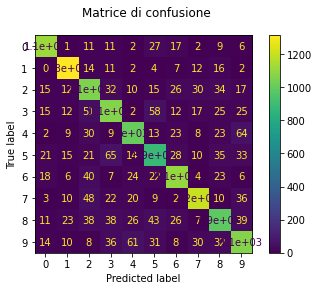

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(best_tree, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"Decision Tree (best):\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_bestTree))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1204
           1       0.93      0.95      0.94      1381
           2       0.80      0.85      0.82      1252
           3       0.82      0.83      0.83      1285
           4       0.86      0.85      0.86      1190
           5       0.80      0.79      0.79      1132
           6       0.88      0.88      0.88      1257
           7       0.91      0.88      0.90      1363
           8       0.83      0.80      0.81      1239
           9       0.82      0.82      0.82      1297

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.86     12600
weighted avg       0.86      0.86      0.86     12600



**DATA VISUALIZATION - predizioni**

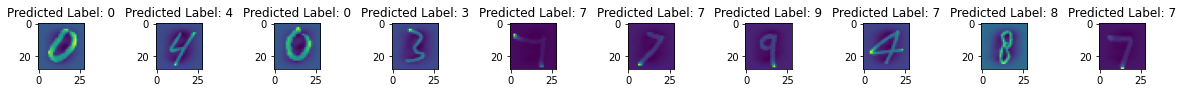

In [ ]:
plt.figure(figsize=(25,10))

for i in range(10):
    plt.subplot(10,12,i+1)
    _2d = X_valid[i].reshape(28,28)
    plt.title(f'Predicted Label: {y_bestTree[i]}')
    plt.imshow(_2d)
plt.show()

**Prediction sul TEST SET**

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/sample_submission.csv")

In [ ]:
%time predictionsBestTree=best_tree.predict(scaled_test)

CPU times: user 52.9 ms, sys: 0 ns, total: 52.9 ms
Wall time: 54.7 ms


In [ ]:
sample_submission["Label"] = predictionsBestTree
sample_submission.to_csv('BestTree_submission.csv', index=False)

*Score Decision Tree (best)*: **0.77425**

In [ ]:
%time predictionsTree=model_tree.predict(scaled_test)

CPU times: user 59 ms, sys: 926 µs, total: 59.9 ms
Wall time: 63.2 ms


In [ ]:
sample_submission["Label"] = predictionsTree
sample_submission.to_csv('Tree_submission.csv', index=False)

*Score Decision Tree*: **0.65021**

# **Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier()

%time rf_model.fit(X_train, y_train)

CPU times: user 19 s, sys: 57 ms, total: 19.1 s
Wall time: 19 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
%time y_rf=rf_model.predict(X_valid)

CPU times: user 532 ms, sys: 2.01 ms, total: 534 ms
Wall time: 532 ms


In [ ]:
#Accuratezza
print("ACCURATEZZA (Random Forest):", metrics.accuracy_score(y_valid, y_rf), "\n")

ACCURATEZZA (Random Forest): 0.9617460317460318 



Il modello fornisce accuratezza 0.95269, un valore alto. Probabilemente c'è overfitting.

Random Forest:
[[1191    0    1    1    0    2    5    0    4    0]
 [   0 1359    5    4    1    1    2    3    5    1]
 [   8    5 1211    6    4    0    5    6    4    3]
 [   2    2   25 1215    1   15    1    7    8    9]
 [   2    3    2    0 1155    0    4    0    2   22]
 [   6    1    0   25    0 1071   11    0    8   10]
 [   7    2    2    0    5    5 1231    0    5    0]
 [   3    8   22    1    7    0    0 1302    3   17]
 [   3   10    5    8    8   11    6    2 1168   18]
 [   9    2    7   20   17    3    1   11   12 1215]]


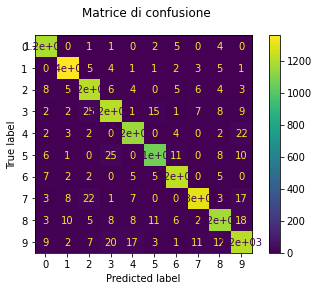

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(rf_model, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"Random Forest:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1204
           1       0.98      0.98      0.98      1381
           2       0.95      0.97      0.96      1252
           3       0.95      0.95      0.95      1285
           4       0.96      0.97      0.97      1190
           5       0.97      0.95      0.96      1132
           6       0.97      0.98      0.98      1257
           7       0.98      0.96      0.97      1363
           8       0.96      0.94      0.95      1239
           9       0.94      0.94      0.94      1297

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [ ]:
rf_model.n_estimators

100

In [ ]:
#K-fold Cross Validation

# Sfruttiamo il K-fold per valutare le performance del modello attraverso 5 diversi Sample
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = RandomForestClassifier()

# calcolo dei cross-validation scores 
cv_scores = cross_val_score(model, X_train, y_train, cv = folds, scoring ='accuracy', n_jobs=-1)

# Stampa i 5 valori di accuratezza dati dai diversi fold
print(cv_scores)
print(f'accuratezza media = {cv_scores.mean()}')

[0.9452381  0.94960317 0.95793651 0.94801587 0.94246032]
accuratezza media = 0.9486507936507935


In [ ]:
iperparametri = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

grid_estimator = GridSearchCV(estimator=RandomForestClassifier(), 
                              param_grid=iperparametri,
                              cv=folds, # strategia di cross validation
                              scoring='accuracy',
                              verbose=2, 
                              n_jobs=4) 

# Fitting the estimator with training data
grid_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   39.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 1875 out of 1875 | elapsed: 12.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score

In [ ]:
best_score=grid_estimator.best_score_
best_iperparametri=grid_estimator.best_params_
print("Best score: ", best_score)
print("Best max_depth: ", best_iperparametri['max_depth'])
print("Best min_samples_leaf: ", best_iperparametri['min_samples_leaf'],)
print("Best max_features: ", best_iperparametri['max_features'],)
print("Best min_samples_leaf: ", best_iperparametri['min_samples_leaf'],)
print("Best n_estimators: ", best_iperparametri['n_estimators'],)

Best score:  0.9234126984126986
Best max_depth:  20
Best min_samples_leaf:  5
Best max_features:  4
Best min_samples_leaf:  5
Best n_estimators:  200


In [ ]:
#best_rf=grid_estimator.best_estimator_
best_rf=RandomForestClassifier(max_depth=20, min_samples_leaf=5,
                               max_features=4, n_estimators=200)

%time best_rf.fit(X_train, y_train)

CPU times: user 6.9 s, sys: 37 ms, total: 6.94 s
Wall time: 6.92 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
%time y_pred=best_rf.predict(X_valid)

CPU times: user 875 ms, sys: 13 ms, total: 888 ms
Wall time: 883 ms


In [ ]:
#Accuratezza
print("ACCURATEZZA (modello migliore) :", metrics.accuracy_score(y_valid, y_pred))

ACCURATEZZA (modello migliore) : 0.9423015873015873


Random Forest (best):
[[1185    0    1    1    0    2   10    0    5    0]
 [   0 1361    7    3    2    0    4    2    2    0]
 [  12   10 1179   11   11    0    7   11   10    1]
 [   2   13   27 1184    1    8    3   13   20   14]
 [   0    6    4    0 1121    0    7    2    6   44]
 [  15    5    2   55    2 1014   23    1    5   10]
 [   7    3    0    0    7    8 1228    0    4    0]
 [   8   19   18    0    5    0    0 1277    6   30]
 [   3   16    4   33    7   11    9    3 1133   20]
 [  12    9    3   22   23    1    0   20   16 1191]]


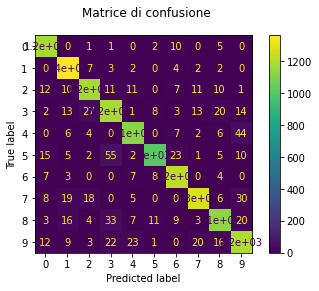

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(best_rf, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"Random Forest (best):\n{disp.confusion_matrix}")

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1204
           1       0.94      0.99      0.96      1381
           2       0.95      0.94      0.94      1252
           3       0.90      0.92      0.91      1285
           4       0.95      0.94      0.95      1190
           5       0.97      0.90      0.93      1132
           6       0.95      0.98      0.96      1257
           7       0.96      0.94      0.95      1363
           8       0.94      0.91      0.93      1239
           9       0.91      0.92      0.91      1297

    accuracy                           0.94     12600
   macro avg       0.94      0.94      0.94     12600
weighted avg       0.94      0.94      0.94     12600



**DATA VISUALIZATION - predizioni**

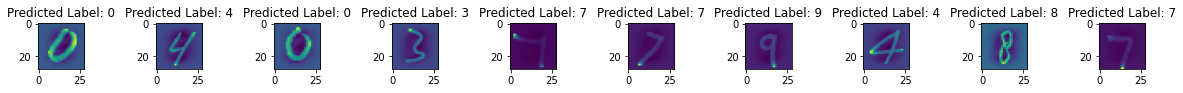

In [ ]:
plt.figure(figsize=(25,10))

for i in range(10):
    plt.subplot(10,12,i+1)
    _2d = X_valid[i].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[i]}')
    plt.imshow(_2d)
plt.show()

**Prediction sul TEST SET**

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/sample_submission.csv")

In [ ]:
%time predictionsRF=best_rf.predict(scaled_test)

CPU times: user 1.72 s, sys: 8.99 ms, total: 1.73 s
Wall time: 1.74 s


In [ ]:
sample_submission["Label"] = predictionsRF
sample_submission.to_csv('RF_submission.csv', index=False)

*Score Random Forest*: **0.92614**

# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model=XGBClassifier()

%time xgb_model.fit(X_train, y_train)

CPU times: user 6min 56s, sys: 588 ms, total: 6min 57s
Wall time: 6min 55s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
%time y_xgb=xgb_model.predict(X_valid)

CPU times: user 818 ms, sys: 14 ms, total: 832 ms
Wall time: 836 ms


In [ ]:
#Accuratezza
print("ACCURATEZZA (XGBoost):", metrics.accuracy_score(y_valid, y_xgb), "\n")

ACCURATEZZA (XGBoost): 0.9294444444444444 



XGB (best):
[[1178    0    3    3    4    3    4    0    7    2]
 [   0 1354    6    4    1    2    4    3    6    1]
 [  11   12 1153   18    7    1    7   19   17    7]
 [   4   11   30 1152    0   22    7   17   22   20]
 [   1    5    4    2 1107    2    3    1    9   56]
 [  11    7    5   31    7 1014   21    1   20   15]
 [   5    2    3    0   10   12 1208    4   13    0]
 [  10    6   25    6    9    1    0 1267    3   36]
 [   4   21   12   19    7   12   13    5 1117   29]
 [   9   12    6   23   43    7    0   24   12 1161]]


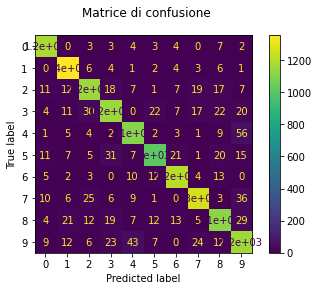

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(xgb_model, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"XGB (best):\n{disp.confusion_matrix}")

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1204
           1       0.95      0.98      0.96      1381
           2       0.92      0.92      0.92      1252
           3       0.92      0.90      0.91      1285
           4       0.93      0.93      0.93      1190
           5       0.94      0.90      0.92      1132
           6       0.95      0.96      0.96      1257
           7       0.94      0.93      0.94      1363
           8       0.91      0.90      0.91      1239
           9       0.87      0.90      0.88      1297

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600



In [ ]:
#K-fold Cross Validation

# Sfruttiamo il K-fold per valutare le performance del modello attraverso 5 diversi Sample
folds = KFold(n_splits = 4, shuffle = True, random_state = 4)

In [ ]:
model = XGBClassifier()

# calcolo dei cross-validation scores 
cv_scores = cross_val_score(model, X_train, y_train, cv = folds, scoring ='accuracy', n_jobs=-1)

# Stampa i 5 valori di accuratezza dati dai diversi fold
print(cv_scores)
print(f'accuratezza media = {cv_scores.mean()}')

[0.9337415  0.93115646 0.93197279 0.9262585 ]
accuratezza media = 0.93078231292517


In [ ]:
iperparametri = {'eta': [0.1, 0.01],
                 'n_estimators': [100,200,300,400,500]}

In [ ]:
grid_estimator = GridSearchCV(estimator=XGBClassifier(), 
                              param_grid=iperparametri,
                              cv=folds, # strategia di cross validation
                              scoring='accuracy',
                              verbose=2, 
                              n_jobs=4) 

# Fitting the estimator with training data
grid_estimator.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 332.6min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 400.6min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=4, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'eta': [0.1, 0.01],
                         'n_estimators': [100, 200, 300, 400, 500]},
       

In [ ]:
best_score=grid_estimator.best_score_
best_iperparametri=grid_estimator.best_params_
print("Best score: ", best_score)
print("Best eta: ", best_iperparametri['eta'])
print("Best n_estimators ", best_iperparametri['n_estimators'],)

Best score:  0.9625510204081633
Best eta:  0.1
Best n_estimators  500


In [ ]:
#best_XGB=grid_estimator.best_estimator_
best_XGB=XGBClassifier(eta=0.1, n_estimators=500)

%time best_XGB.fit(X_train, y_train)

CPU times: user 35min 3s, sys: 1.82 s, total: 35min 5s
Wall time: 34min 56s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
%time y_pred=best_XGB.predict(X_valid)

CPU times: user 4.13 s, sys: 177 ms, total: 4.3 s
Wall time: 4.28 s


In [ ]:
#Accuratezza
print("ACCURATEZZA (modello migliore) :", metrics.accuracy_score(y_valid, y_pred))

ACCURATEZZA (modello migliore) : 0.965952380952381


XGB (best):
[[1189    0    2    2    2    0    4    0    5    0]
 [   0 1363    7    1    1    1    1    5    1    1]
 [   4    6 1211   10    2    2    2    5    6    4]
 [   1    7   19 1211    2   13    1    8    6   17]
 [   1    3    4    0 1165    0    2    0    2   13]
 [   3    3    4   16    4 1080   12    1    6    3]
 [   5    2    0    0    3    8 1235    0    4    0]
 [   7    5   12    2    6    1    0 1312    2   16]
 [   3    7    4    9    4    9    7    2 1178   16]
 [   5    4    5   15   15    7    0   10    9 1227]]


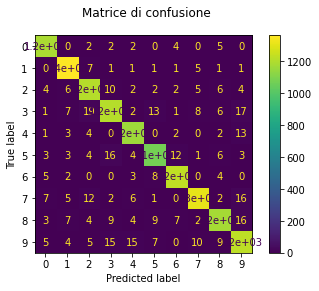

In [ ]:
#Matrice di confusione
disp = metrics.plot_confusion_matrix(best_XGB, X_valid, y_valid)
disp.figure_.suptitle("Matrice di confusione")
print(f"XGB (best):\n{disp.confusion_matrix}")

In [ ]:
#Classification Report
print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1204
           1       0.97      0.99      0.98      1381
           2       0.96      0.97      0.96      1252
           3       0.96      0.94      0.95      1285
           4       0.97      0.98      0.97      1190
           5       0.96      0.95      0.96      1132
           6       0.98      0.98      0.98      1257
           7       0.98      0.96      0.97      1363
           8       0.97      0.95      0.96      1239
           9       0.95      0.95      0.95      1297

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



**DATA VISUALIZATION - predizioni**

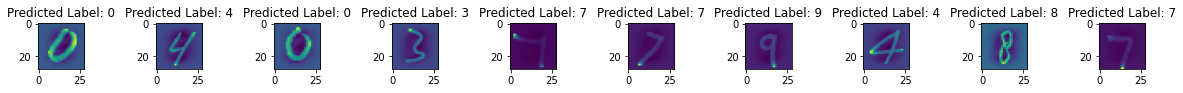

In [ ]:
plt.figure(figsize=(25,10))

for i in range(10):
    plt.subplot(10,12,i+1)
    _2d = X_valid[i].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[i]}')
    plt.imshow(_2d)
plt.show()

**Prediction sul TEST SET**

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/sample_submission.csv")

In [ ]:
%time predictionsXGB=best_XGB.predict(scaled_test)

CPU times: user 9.29 s, sys: 27 ms, total: 9.32 s
Wall time: 9.31 s


In [ ]:
sample_submission["Label"] = predictionsXGB
sample_submission.to_csv('XGB_submission.csv', index=False)

*Score XGBoost*: **0.92760**

# **CNN - no Image Augmentation**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

In [ ]:
# Reshape delle immagini
img_size = 28
X_cnn=train_data.values.reshape(-1, img_size, img_size, 1)

print(X_cnn.shape)

(42000, 28, 28, 1)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_cnn, target, test_size = 0.3, random_state = 4)

In [ ]:
# Conversione in ONE-HOT ENCODING
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [ ]:
def create_cnn_model(pool_type='max', conv_activation='sigmoid', dropout_rate=0.10):
    # Creazione del modello
    model = Sequential()
    
    # Primo layer: CONVOLUZIONE
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1))) 
        
    # Seconda serie di layer: CONVOLUZIONE, POOLING e DROPOUT
    model.add(Conv2D(32, kernel_size=(5, 5), activation=conv_activation))  
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))  

         # Terza serie di layer: CONVOLUZIONE, POOLING E DROPOUT   
    model.add(Conv2D(64, kernel_size=(3, 3), activation=conv_activation))    
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))     
      
    # Quarta serie di layer
    model.add(Flatten())         
    model.add(Dense(64, activation='sigmoid')) # 64
    # se dropout_rate è diverso da 0 si aggiunge un Dropout  
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate)) 
        
    model.add(Dense(10, activation='softmax'))

    # Compile del modello
    model.compile( 
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
    return model

In [ ]:
model_cnn = create_cnn_model()  

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=5, restore_best_weights=True)

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        12832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0

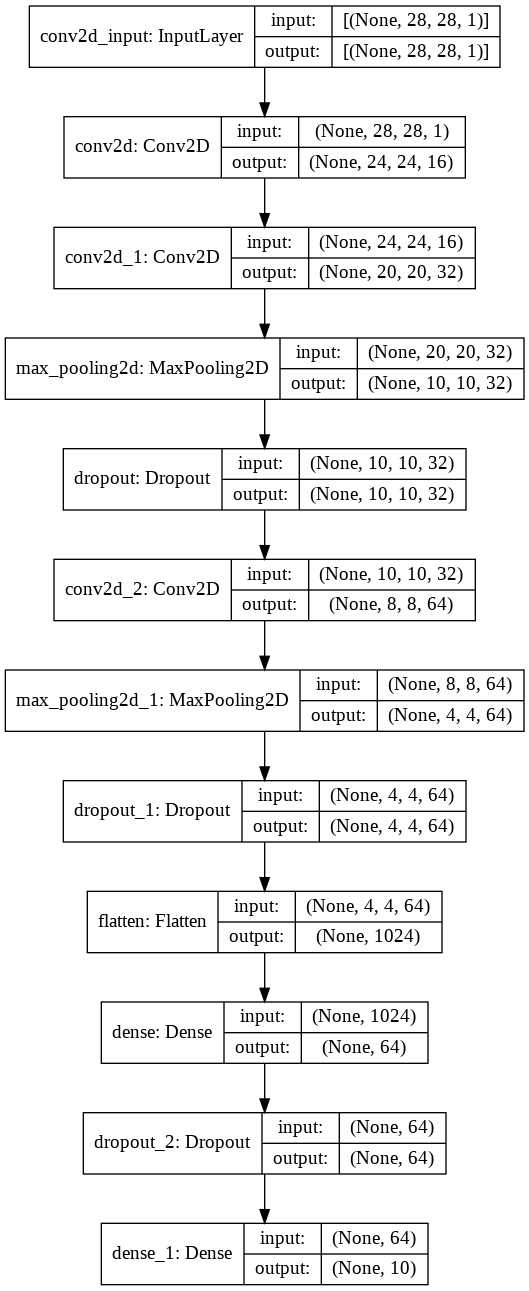

In [ ]:
plot_model(model_cnn, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
#Train del modello CNN
%time history = model_cnn.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=35, callbacks = [early_stop])

Epoch 1/30
840/840 [==============================] - 76s 70ms/step - loss: 1.2360 - accuracy: 0.6017 - val_loss: 0.1542 - val_accuracy: 0.9605
Epoch 2/30
840/840 [==============================] - 58s 69ms/step - loss: 0.1464 - accuracy: 0.9615 - val_loss: 0.0910 - val_accuracy: 0.9754
Epoch 3/30
840/840 [==============================] - 58s 69ms/step - loss: 0.0903 - accuracy: 0.9742 - val_loss: 0.0766 - val_accuracy: 0.9778
Epoch 4/30
840/840 [==============================] - 58s 69ms/step - loss: 0.0669 - accuracy: 0.9808 - val_loss: 0.0597 - val_accuracy: 0.9825
Epoch 5/30
840/840 [==============================] - 58s 69ms/step - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.0576 - val_accuracy: 0.9829
Epoch 6/30
840/840 [==============================] - 58s 69ms/step - loss: 0.0478 - accuracy: 0.9865 - val_loss: 0.0492 - val_accuracy: 0.9845
Epoch 7/30
840/840 [==============================] - 59s 70ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0473 - val_accuracy:

In [ ]:
%time y_pred = model_cnn.predict(X_valid)

# Conversione delle classi predette da one-hot vector al formato originale della label 
y_pred_classes = np.argmax(y_pred,axis = 1) 

# Riconversione di y_valid da one-hot vector a formato originale
y_true = np.argmax(y_valid,axis = 1)  

CPU times: user 8.7 s, sys: 200 ms, total: 8.9 s
Wall time: 5.19 s


In [ ]:
#Accuratezza
print("ACCURATEZZA (CNN senza IMAGE AUGMENTATION):", metrics.accuracy_score(y_true, y_pred_classes), "\n")

ACCURATEZZA (CNN senza IMAGE AUGMENTATION): 0.9888888888888889 



In [ ]:
#Matrice di confusione 
print(confusion_matrix(y_true, y_pred_classes))

[[1195    0    1    0    0    1    5    0    2    0]
 [   0 1363    5    0    2    0    1    5    4    1]
 [   1    0 1243    3    0    0    0    2    2    1]
 [   0    0    5 1268    0    3    0    3    3    3]
 [   0    1    1    0 1175    0    4    1    1    7]
 [   1    0    0    5    0 1119    1    0    4    2]
 [   0    0    1    0    2    3 1248    0    3    0]
 [   0    0   10    0    2    0    0 1344    2    5]
 [   1    1    6    2    0    1    1    0 1223    4]
 [   3    0    1    2    4    0    0    2    3 1282]]


In [ ]:
#Classification Report
print(metrics.classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1204
           1       1.00      0.99      0.99      1381
           2       0.98      0.99      0.98      1252
           3       0.99      0.99      0.99      1285
           4       0.99      0.99      0.99      1190
           5       0.99      0.99      0.99      1132
           6       0.99      0.99      0.99      1257
           7       0.99      0.99      0.99      1363
           8       0.98      0.99      0.98      1239
           9       0.98      0.99      0.99      1297

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



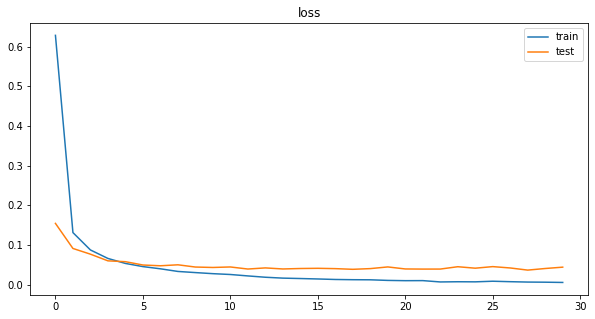

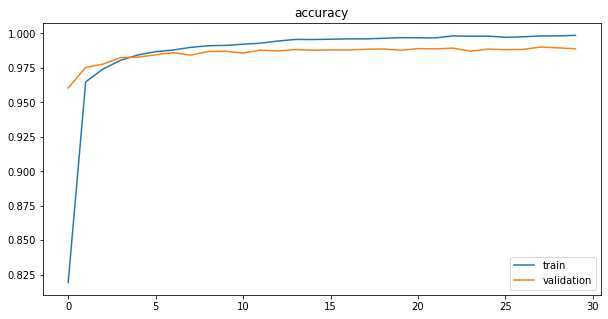

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('accuracy')
plt.legend()
plt.show()

**DATA VISUALIZATION - predizioni**

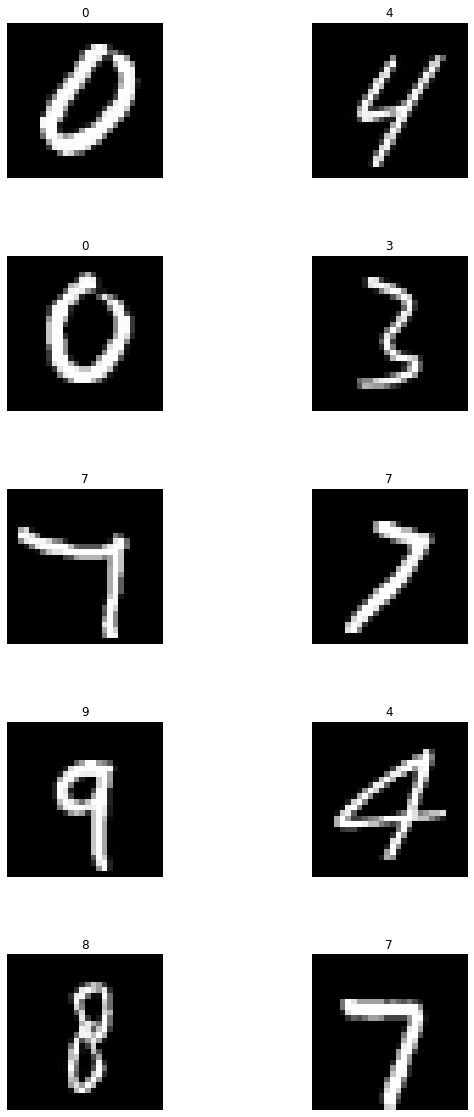

In [ ]:
plt.figure(figsize=(10, 20))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    digit=X_valid[i]
    plt.imshow(digit.reshape(28,28), cmap="gray", interpolation="nearest")
    plt.axis('off')
    plt.title(y_pred_classes[i], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Prediction sul TEST SET**

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/sample_submission.csv")

In [ ]:
%time y_pred=model_cnn.predict(test_data.values.reshape(-1,28,28,1))

predictionsCNN=np.argmax(y_pred, axis=1)

CPU times: user 18.6 s, sys: 477 ms, total: 19.1 s
Wall time: 10.9 s


In [ ]:
sample_submission["Label"] = predictionsCNN
sample_submission.to_csv('CNN1_submission.csv', index=False)

*Score CNN senza Image Augmentation*: **0.98864**


# **CNN - Image Augmentation**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Reshape delle immagini
img_size = 28
X_cnn=train_data.values.reshape(-1, img_size, img_size, 1)

print(X_cnn.shape)

(42000, 28, 28, 1)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_cnn, target, test_size = 0.15, random_state = 4)

In [ ]:
# Conversione in ONE-HOT ENCODING
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [ ]:
def create_cnn_model(pool_type='max', conv_activation='sigmoid', dropout_rate=0.10):
    # Creazione del modello
    model = Sequential()
    
    # Primo layer: CONVOLUZIONE
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1))) 
        
    # Seconda serie di layer: CONVOLUZIONE, POOLING e DROPOUT
    model.add(Conv2D(32, kernel_size=(5, 5), activation=conv_activation))  
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))  

         # Terza serie di layer: CONVOLUZIONE, POOLING E DROPOUT   
    model.add(Conv2D(64, kernel_size=(3, 3), activation=conv_activation))    
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))     
      
    # Quarta serie di layer
    model.add(Flatten())         
    model.add(Dense(64, activation='sigmoid')) # 64
    # se dropout_rate è diverso da 0 si aggiunge un Dropout  
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate)) 
        
    model.add(Dense(10, activation='softmax'))

    # Compile del modello
    model.compile( 
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
    return model
     

In [ ]:
model_cnn = create_cnn_model()  

In [ ]:
#Image Augmentation

datagen = ImageDataGenerator(
        zca_whitening=False,  # applica ZCA whitening
        rotation_range=10,  # ruota le immagini di un certo numero di gradi tra 0 e 180
        zoom_range = 0.1, # ingrandisce le immagini di una certa percentuale
        width_shift_range=0.1,  # sposta le immagini orizzontalmente
        height_shift_range=0.1,  # sposta le immagini verticalmente
        horizontal_flip=False,  # capovolge le immagini
        vertical_flip=False)  # capovolge le immagini


datagen.fit(X_train)

In [ ]:
#Learning Rate Reduction
import tensorflow as tf

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [ ]:
#Early stopping

early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=5, restore_best_weights=True)

In [ ]:
batch_size = 112
n_epochs=30

In [ ]:
# Fit del modello
%time history = model_cnn.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size), epochs = n_epochs, validation_data = (X_valid,y_valid), verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size, callbacks=[learning_rate_reduction, early_stop])
#history = model_cnn.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size), 
#                                        epochs = n_epochs, validation_data = (X_valid,y_valid), 
#                                        verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size, 
#                                        callbacks=[learning_rate_reduction, early_stop])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
318/318 - 78s - loss: 1.4129 - accuracy: 0.5394 - val_loss: 0.3756 - val_accuracy: 0.9294
Epoch 2/30
318/318 - 61s - loss: 0.4452 - accuracy: 0.8810 - val_loss: 0.1760 - val_accuracy: 0.9544
Epoch 3/30
318/318 - 60s - loss: 0.2748 - accuracy: 0.9240 - val_loss: 0.1213 - val_accuracy: 0.9656
Epoch 4/30
318/318 - 61s - loss: 0.2169 - accuracy: 0.9382 - val_loss: 0.0959 - val_accuracy: 0.9730
Epoch 5/30
318/318 - 61s - loss: 0.1818 - accuracy: 0.9474 - val_loss: 0.0840 - val_accuracy: 0.9760
Epoch 6/30
318/318 - 61s - loss: 0.1560 - accuracy: 0.9554 - val_loss: 0.0784 - val_accuracy: 0.9765
Epoch 7/30
318/318 - 61s - loss: 0.1432 - accuracy: 0.9585 - val_loss: 0.0728 - val_accuracy: 0.9762
Epoch 8/30
318/318 - 61s - loss: 0.1265 - accuracy: 0.9631 - val_loss: 0.0663 - val_accuracy: 0.9798
Epoch 9/30
318/318 - 61s - loss: 0.1176 - accuracy: 0.9654 - val_loss: 0.0657 - val_accuracy: 0.9803
Epoch 10/30
318/318 - 61s - loss: 0.1086 - accuracy: 0.9686 - val_loss: 0.0576 - val_accura

In [ ]:
%time y_pred = model_cnn.predict(X_valid)

# Conversione delle classi predette da one-hot vector al formato originale della label 
y_pred_classes = np.argmax(y_pred,axis = 1) 

# Riconversione di y_valid da one-hot vector a formato originale
y_true = np.argmax(y_valid,axis = 1)  

CPU times: user 4.22 s, sys: 89.8 ms, total: 4.31 s
Wall time: 2.58 s


In [ ]:
#Accuratezza
print("ACCURATEZZA (CNN con IMAGE AUGMENTATION):", metrics.accuracy_score(y_true, y_pred_classes), "\n")

ACCURATEZZA (CNN con IMAGE AUGMENTATION): 0.9892063492063492 

[[619   0   0   0   0   0   1   0   0   0]
 [  0 684   5   2   1   0   0   4   1   0]
 [  1   0 611   1   0   0   0   1   3   0]
 [  0   0   2 644   0   1   0   2   2   2]
 [  0   0   1   0 579   0   0   0   0   3]
 [  0   0   0   1   0 588   3   0   1   0]
 [  0   0   0   0   0   3 605   0   2   0]
 [  0   0   5   0   1   0   0 658   2   2]
 [  0   0   2   0   1   1   0   0 599   2]
 [  0   0   0   1   2   2   0   0   4 645]]


In [ ]:
#Matrice di confusione 
confusion_mtx=confusion_matrix(y_true, y_pred_classes))

plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
#Classification Report
print(metrics.classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       620
           1       1.00      0.98      0.99       697
           2       0.98      0.99      0.98       617
           3       0.99      0.99      0.99       653
           4       0.99      0.99      0.99       583
           5       0.99      0.99      0.99       593
           6       0.99      0.99      0.99       610
           7       0.99      0.99      0.99       668
           8       0.98      0.99      0.98       605
           9       0.99      0.99      0.99       654

    accuracy                           0.99      6300
   macro avg       0.99      0.99      0.99      6300
weighted avg       0.99      0.99      0.99      6300



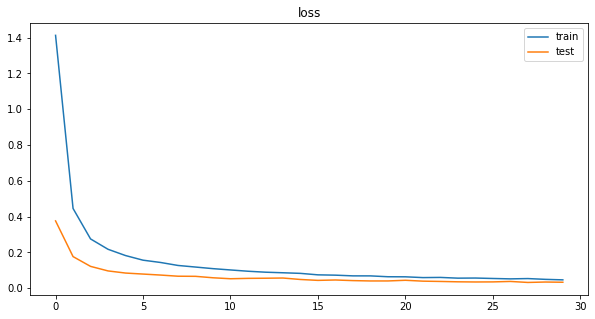

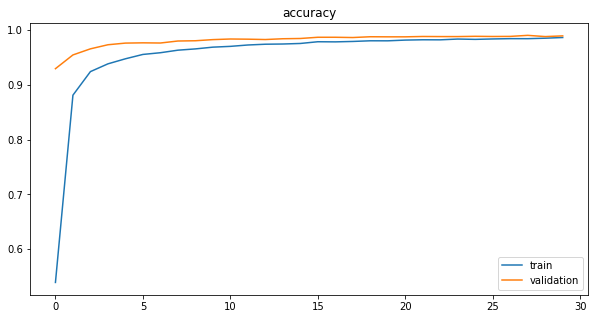

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('accuracy')
plt.legend()
plt.show()

**DATA VISUALIZATION - predizioni**

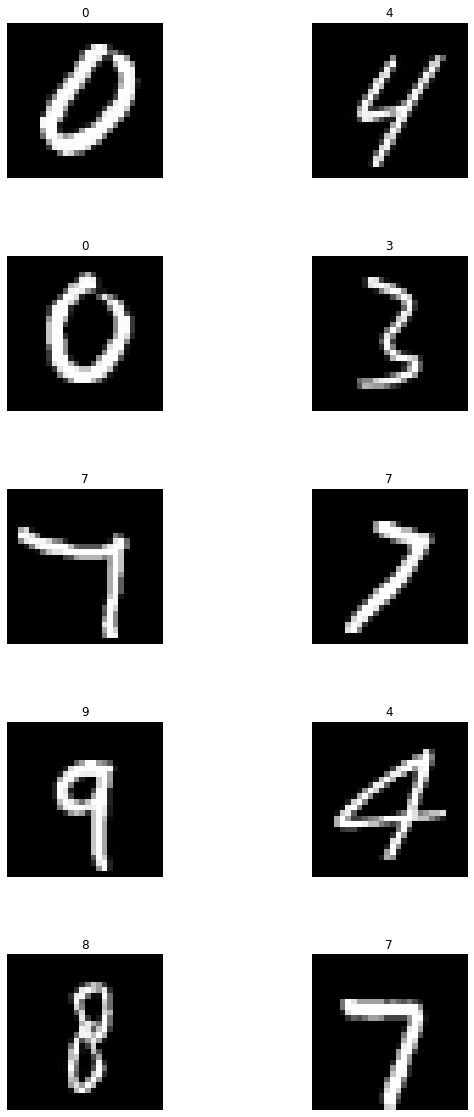

In [ ]:
plt.figure(figsize=(10, 20))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    digit=X_valid[i]
    plt.imshow(digit.reshape(28,28), cmap="gray", interpolation="nearest")
    plt.axis('off')
    plt.title(y_pred_classes[i], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Prediction sul TEST SET**

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Digit Recognizer/sample_submission.csv")

In [ ]:
%time y_pred=model_cnn.predict(test_data.values.reshape(-1,28,28,1))

predictionsCNN=np.argmax(y_pred, axis=1)

CPU times: user 17.4 s, sys: 450 ms, total: 17.8 s
Wall time: 10.2 s


In [ ]:
sample_submission["Label"] = predictionsCNN
sample_submission.to_csv('CNN2_submission.csv', index=False)

*Score CNN con Image Augmentation*: **0.99150**